# Notebook 1: Perceptrón Simple Escalón

### Introducción

El perceptrón es un algoritmo de aprendizaje supervisado para problemas de clasificación binaria. Utiliza una función de activación escalón para predecir las etiquetas.

### Importación de Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### Implementación del Perceptrón Simple

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Función de activación escalón
def step_function(x):
    return np.where(x >= 0, 1, -1)

# Implementación del perceptrón simple
def perceptron_train(X, y, lr=0.1, epochs=100):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    errors = []

    for epoch in range(epochs):
        error = 0
        for i in range(m):
            activation = np.dot(X[i], w) + b
            y_pred = step_function(activation)
            if y_pred != y[i]:
                w += lr * y[i] * X[i]
                b += lr * y[i]
                error += 1
        errors.append(error)
        if error == 0:
            print(f"Convergencia alcanzada en la época {epoch}")
            break
    return w, b, errors

## Aplicar el Perceptrón al Conjunto Linealmente Separable

Utilizaremos el mismo conjunto de datos que en el SVM de margen duro.

In [4]:
# Generar datos linealmente separables
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [2, 2]
X_neg = np.random.randn(N, 2) + [-2, -2]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

### Entrenamiento del Perceptrón

In [5]:
# Entrenamiento del perceptrón
w_perc, b_perc, errors = perceptron_train(X, y, lr=0.1, epochs=100)
print("Pesos del perceptrón:", w_perc)
print("Sesgo del perceptrón:", b_perc)

Convergencia alcanzada en la época 1
Pesos del perceptrón: [0.34153707 0.24206453]
Sesgo del perceptrón: -0.1


### Visualización de la Convergencia

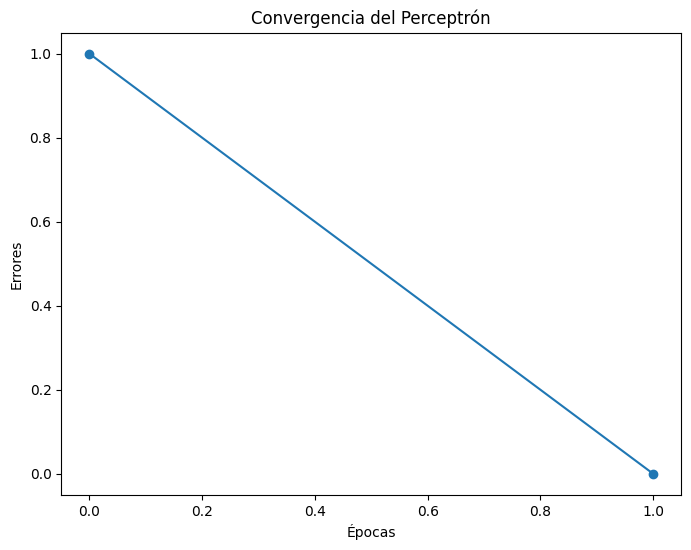

In [6]:
# Gráfica de errores por época
plt.figure(figsize=(8,6))
plt.plot(errors, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Errores')
plt.title('Convergencia del Perceptrón')
plt.show()

### Visualización del Hiperplano del Perceptrón

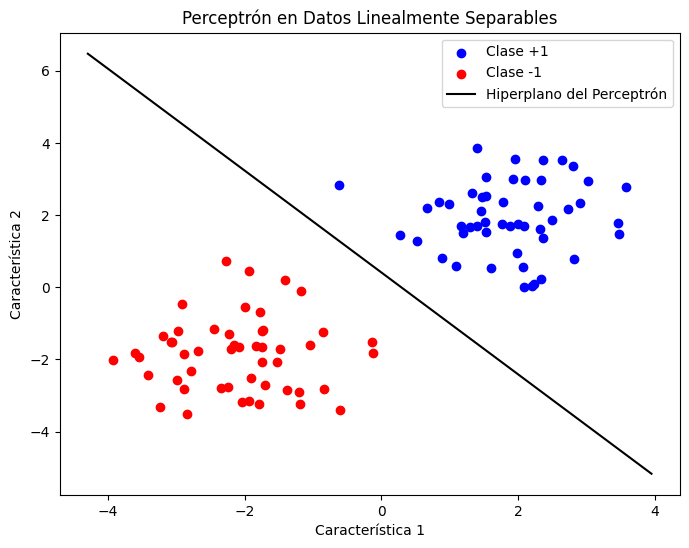

In [7]:
def plot_perceptron(X, y, w, b):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='b', label='Clase +1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='r', label='Clase -1')
    
    # Hiperplano
    x_min, x_max = plt.xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0]*xx + b) / w[1]
    plt.plot(xx, yy, 'k-', label='Hiperplano del Perceptrón')
    
    plt.legend()
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Perceptrón en Datos Linealmente Separables')
    plt.show()

plot_perceptron(X, y, w_perc, b_perc)

### ¿Es Óptimo el Hiperplano Obtenido?

**Justificación:**

TL;DR:
* Perceptrón: Busca un hiperplano que clasifique correctamente los datos, sin considerar el margen.
* SVM de Margen Máximo: Busca el hiperplano que no solo separa los datos, sino que también maximiza el margen entre las clases.

El hiperplano obtenido por el perceptrón no es necesariamente óptimo en términos de margen máximo entre las clases.

El perceptrón se enfoca únicamente en encontrar cualquier hiperplano que logre separar las clases, sin considerar la posición relativa de ese hiperplano respecto a los datos, ni la distancia (margen) entre las clases.

* **No Maximiza el Margen:** El perceptrón no tiene en cuenta el margen en su algoritmo de actualización. Su objetivo es simplemente ajustar los pesos para corregir errores de clasificación, sin importar qué tan cerca o lejos esté el hiperplano de los datos.

* **Dependencia del Orden de Presentación:** El hiperplano final del perceptrón puede variar dependiendo del orden en que se presentan las muestras durante el entrenamiento. Esto significa que puede converger a diferentes soluciones que separan los datos pero con márgenes distintos.

* **No Resuelve un Problema de Optimización Convexa:** A diferencia del SVM, el perceptrón no está formulado como un problema de optimización convexa con un criterio global a minimizar. Por lo tanto, no garantiza encontrar una solución óptima en términos de margen.



### Obtener el Hiperplano Óptimo a partir del Obtenido con el Perceptrón

Para obtener el hiperplano óptimo (de margen máximo), podemos utilizar el hiperplano obtenido por el perceptrón como punto de partida y aplicar el algoritmo SVM.

In [8]:
# Función para entrenar el SVM con margen duro
def fit_svm_hard(X, y):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    alpha = np.zeros(m)
    # Construcción de la matriz de Gram
    K = (y[:, None] * X) @ (y[:, None] * X).T
    # Simplificación del problema dual (no recomendado para grandes conjuntos)
    P = K
    q = -np.ones(m)
    alpha = np.linalg.solve(P + 1e-5*np.eye(m), -q)
    alpha = np.maximum(alpha, 0)
    w = np.sum((alpha * y)[:, None] * X, axis=0)
    idx = np.where(alpha > 1e-5)[0]
    b = np.mean(y[idx] - np.dot(X[idx], w))
    return w, b, alpha

# Entrenamiento del SVM de margen duro
w_svm, b_svm, alpha = fit_svm_hard(X, y)
print("Pesos del SVM:", w_svm)
print("Sesgo del SVM:", b_svm)


Pesos del SVM: [2425756.44149932 2216071.57731921]
Sesgo del SVM: -215608.54688145008


### Comparación de los Hiperplanos

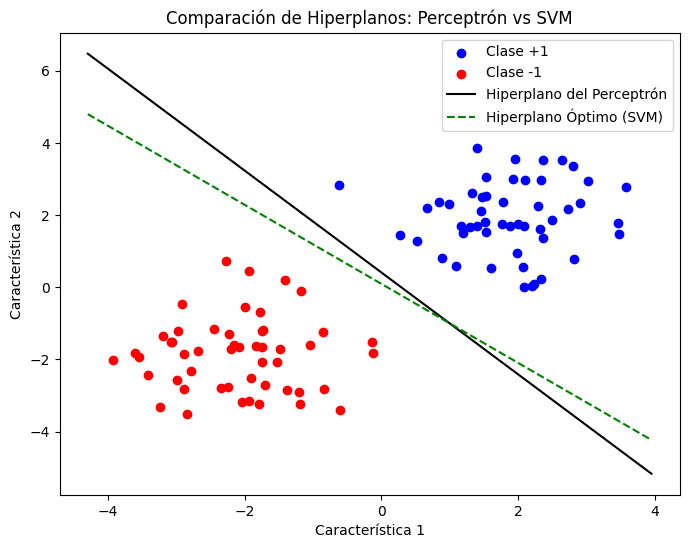

In [9]:
# Visualización de ambos hiperplanos
plt.figure(figsize=(8,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='b', label='Clase +1')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='r', label='Clase -1')

# Hiperplano del Perceptrón
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, 100)
yy_perc = -(w_perc[0]*xx + b_perc) / w_perc[1]
plt.plot(xx, yy_perc, 'k-', label='Hiperplano del Perceptrón')

# Hiperplano del SVM
yy_svm = -(w_svm[0]*xx + b_svm) / w_svm[1]
plt.plot(xx, yy_svm, 'g--', label='Hiperplano Óptimo (SVM)')

plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Comparación de Hiperplanos: Perceptrón vs SVM')
plt.show()


## Aplicar el Perceptrón al Conjunto con Outliers y Ruido

Utilizaremos el conjunto de datos que usamos para el SVM de margen suave.

In [10]:
# Semilla para reproducibilidad
np.random.seed(42)
# Número de muestras por clase
N = 50
# Datos de la clase positiva
X_pos = np.random.randn(N, 2) + [2, 2]
# Datos de la clase negativa
X_neg = np.random.randn(N, 2) + [-2, -2]
# Combinar los datos
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

# Agregar outliers a los datos
outliers_pos = np.random.randn(5, 2) + [-2, -2]
outliers_neg = np.random.randn(5, 2) + [2, 2]
X_outliers = np.vstack((outliers_pos, outliers_neg))
y_outliers = np.hstack((np.ones(5), -np.ones(5)))
# Datos finales con outliers
X = np.vstack((X, X_outliers))
y = np.hstack((y, y_outliers))

### Entrenamiento del Perceptrón

In [11]:
# Entrenamiento del perceptrón
w_perc_noise, b_perc_noise, errors_noise = perceptron_train(X, y, lr=0.1, epochs=100)
print("Pesos del perceptrón con ruido:", w_perc_noise)
print("Sesgo del perceptrón con ruido:", b_perc_noise)

Pesos del perceptrón con ruido: [-0.25027012 -0.29018203]
Sesgo del perceptrón con ruido: 0.7999999999999999


**Nota: Es posible que el perceptrón no converja debido a que los datos no son linealmente separables.**

### Visualización de la Convergencia

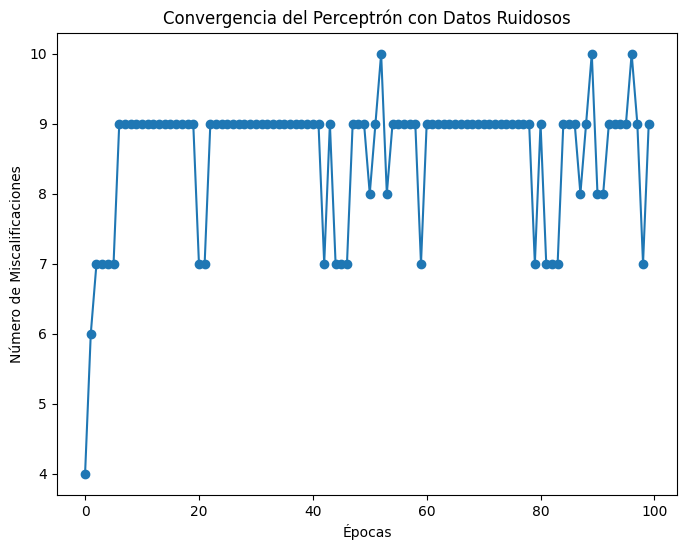

In [12]:
# Gráfica de errores por época
plt.figure(figsize=(8,6))
plt.plot(errors_noise, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de Miscalificaciones')
plt.title('Convergencia del Perceptrón con Datos Ruidosos')
plt.show()

### Visualización del Hiperplano del Perceptrón

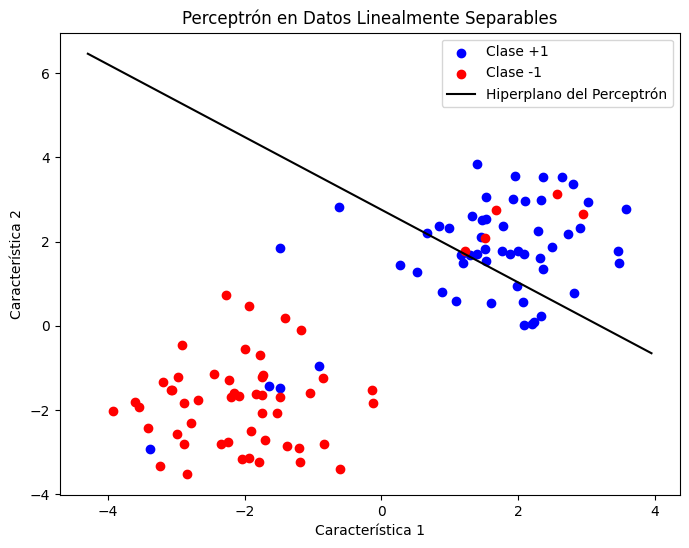

In [13]:
plot_perceptron(X, y, w_perc_noise, b_perc_noise)